## Tutorial for using scoreCT to automate cell type annotation in scRNA-seq data

In [1]:
# Import modules
import os
import sys
import pandas as pd
import scanpy.api as sc

sys.path.append('../src/')
import scorect as ct

# Load example data
adata = sc.read('../data/data.h5ad')

# Load reference table
ref_marker = pd.read_csv('../data/ref_marker.csv', index_col=0, header=None).T

/Users/lucas/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [2]:
# Wrangle results from existing sc.tl.rank_genes_groups() results
marker_df = ct.wrangle_ranked_genes(adata)
print(marker_df.head())

Number of markers used in ranked_gene_groups:  100
     z_score      adj_pvals        gene  cluster_number
0  43.342510  3.071254e-232       MGST1               0
1  37.299587  1.603663e-192        PRTG               0
2  34.916588  5.225948e-183       NR2F1               0
3  29.018284  5.412440e-137       SFRP2               0
4  28.860355  4.856073e-136  AC018730.1               0


In [3]:
# Score cell types for each cluster and print an example for cluster 0
dict_scores = ct.score_clusters(marker_df, ref_marker=ref_marker, nb_marker=100, bin_size=20)
print(dict_scores[0])

{'Neural stem cells': 5, 'Intermediate Progenitor Cells': 0, 'Radial Glia Cells': 5, 'Glial-Restricted Progenitors': 0, 'Astrocytes': 0, 'Oligodendrocytes': 0, 'Neuron Progenitors': 0, 'Neurons': 0, 'Cajal-Retzius Neurons': 0, 'Neuroepithelium ': 10}


... storing 'Assigned type' as categorical


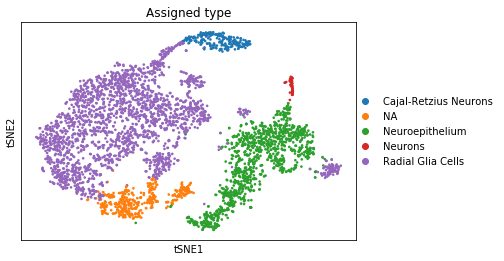

In [4]:
# Assign cell types if possible (if there is no ties in scores)
ct.assign_celltypes(adata, dict_scores)
# Visualize results thanks to Scanpy tSNE tool
sc.pl.tsne(adata, color='Assigned type')